# Content-based Forward Feature Selection (XGB)

In [1]:
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

The URL dataset with generated lexical and content-based features are read from a csv file. These are then displayed for visualization purposes.

In [2]:
dataset = pd.read_csv('binary_unbalanced_with_content.csv')
dataset.head()

,url_type,blank_lines_count,blank_spaces_count,word_count,average_word_len,webpage_size,webpage_entropy,js_count,sus_js_count,js_eval_count,...,has_swf_in_string,has_cgi_in_string,has_php_in_string,has_abuse_in_string,has_admin_in_string,has_bin_in_string,has_personal_in_string,has_update_in_string,has_verification_in_string,url_scheme
0,1,14,36,0,0.000000,1186,5.269303,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,415,3952,11450,4.683930,26155,4.565537,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,5715,88450,420,5.833333,339327,4.656704,13,10,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1461,6292,3049,4.515907,89249,5.149580,11,2,0,...,0,0,0,0,0,0,0,0,0,0
4,0,43,273,0,0.000000,1530,4.754726,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
features = dataset.iloc[:, 1:]
url_type = dataset.iloc[:, 0]

In [4]:
features.head()

,blank_lines_count,blank_spaces_count,word_count,average_word_len,webpage_size,webpage_entropy,js_count,sus_js_count,js_eval_count,js_escape_count,...,has_swf_in_string,has_cgi_in_string,has_php_in_string,has_abuse_in_string,has_admin_in_string,has_bin_in_string,has_personal_in_string,has_update_in_string,has_verification_in_string,url_scheme
0,14,36,0,0.000000,1186,5.269303,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,415,3952,11450,4.683930,26155,4.565537,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5715,88450,420,5.833333,339327,4.656704,13,10,1,2,...,0,0,0,0,0,0,0,0,0,0
3,1461,6292,3049,4.515907,89249,5.149580,11,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,43,273,0,0.000000,1530,4.754726,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
url_type.head()

0    1
1    0
2    0
3    0
4    0
Name: url_type, dtype: int64

A forward feature selection algorithm is then ran on the dataset using RF with a scoring that's dependent on accuracy and a cross validatoin of 5.

In [8]:
forward_feature_selection = SequentialFeatureSelector(XGBClassifier(), k_features = 113, forward = True,
                                                      floating = False, verbose = 10, scoring = 'accuracy', n_jobs = 16).fit(features, url_type)

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    5.8s
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    8.2s
[Parallel(n_jobs=16)]: Done  29 tasks      | elapsed:   10.4s
[Parallel(n_jobs=16)]: Done  40 tasks      | elapsed:   13.3s
[Parallel(n_jobs=16)]: Done  53 tasks      | elapsed:   17.4s
[Parallel(n_jobs=16)]: Done  66 tasks      | elapsed:   19.2s
[Parallel(n_jobs=16)]: Done  81 tasks      | elapsed:   21.1s
[Parallel(n_jobs=16)]: Done  94 out of 113 | elapsed:   22.3s remaining:    4.5s
[Parallel(n_jobs=16)]: Done 106 out of 113 | elapsed:   23.7s remaining:    1.6s
[Parallel(n_jobs=16)]: Done 113 out of 113 | elapsed:   24.6s finished

[2024-04-02 01:17:21] Features: 1/113 -- score: 0.8164293317650249[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:    8.9s
[Parallel(n_jobs=16)]: Done  18 tasks      | elaps

Once all iterations have finished, the results of each iteration are displayed.

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(47,)","[0.877148260833813, 0.727215415398953, 0.6325960036181235, 0.8886330619740701, 0.9565539170001645]",0.816429,"(url_host_length,)",0.152391,0.118565,0.059283
2,"(27, 47)","[0.9142066167804183, 0.7707151275936738, 0.6985171175616041, 0.8943617575309049, 0.9706430568499534]",0.849689,"(input_tag_count, url_host_length)",0.128372,0.099878,0.049939
3,"(27, 47, 48)","[0.9716854425348792, 0.7888057451415728, 0.7047666036236055, 0.9086697914096976, 0.9800449536757854]",0.870795,"(input_tag_count, url_host_length, url_number_of_subdirectories)",0.138235,0.107551,0.053776
4,"(27, 37, 47, 48)","[0.9543897157580243, 0.8272894224707398, 0.7579694652303812, 0.9236082559000082, 0.9681760868373445]",0.886287,"(input_tag_count, url_length, url_host_length, url_number_of_subdirectories)",0.103914,0.080849,0.040424
5,"(27, 37, 47, 48, 56)","[0.9544993558643752, 0.8952114683551243, 0.8539319683140093, 0.9503604418496286, 0.9466586261718107]",0.920132,"(input_tag_count, url_length, url_host_length, url_number_of_subdirectories, url_num_periods)",0.050771,0.039502,0.019751
6,"(21, 27, 37, 47, 48, 56)","[0.9641750952498424, 0.9132198558232602, 0.8647863388427487, 0.9594879807033413, 0.9520311386437147]",0.93074,"(meta_tag_count, input_tag_count, url_length, url_host_length, url_number_of_subdirectories, url_num_periods)",0.048278,0.037562,0.018781
7,"(6, 21, 27, 37, 47, 48, 56)","[0.9667516377490886, 0.9167831592796645, 0.879341062960831, 0.9633527944522107, 0.9572391864481113]",0.936694,"(js_count, meta_tag_count, input_tag_count, url_length, url_host_length, url_number_of_subdirectories, url_num_periods)",0.04348,0.033829,0.016915
8,"(6, 21, 27, 37, 43, 47, 48, 56)","[0.9715209823753529, 0.9216895540388674, 0.8890990324260615, 0.9656004166324041, 0.9540869469875555]",0.940399,"(js_count, meta_tag_count, input_tag_count, url_length, url_number_of_digits, url_host_length, url_number_of_subdirectories, url_num_periods)",0.03971,0.030896,0.015448
9,"(6, 21, 27, 37, 39, 43, 47, 48, 56)","[0.9743716251404764, 0.9228681851821396, 0.8900035633034564, 0.9682865992380013, 0.9565265062222466]",0.942411,"(js_count, meta_tag_count, input_tag_count, url_length, url_domain_entropy, url_number_of_digits, url_host_length, url_number_of_subdirectories, url_num_periods)",0.040721,0.031682,0.015841
10,"(2, 6, 21, 27, 37, 39, 43, 47, 48, 56)","[0.9744264451936518, 0.9246224268837541, 0.8927993860154044, 0.9691363100622208, 0.9534290883175265]",0.942883,"(word_count, js_count, meta_tag_count, input_tag_count, url_length, url_domain_entropy, url_number_of_digits, url_host_length, url_number_of_subdirectories, url_num_periods)",0.039142,0.030454,0.015227


The program then looks for when the accuracy plateaus. For this implementation, a plateau is when the accuracy does not increase by more than 0.1%. The features from the longest occuring plateau are extracted and is considered as the final featureset.

In [10]:
all_iterations = pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T
all_iterations_series = pd.Series(all_iterations['avg_score'])
all_iterations_list = all_iterations_series.to_list()

prev = all_iterations_list[0]
for accuracy in all_iterations_list[1:]:
    if accuracy > prev*1.001:
        prev = accuracy
        pass
    else:
        print('Plateus at: ', all_iterations_list.index(prev))

Plateus at:  8
Plateus at:  10
Plateus at:  10
Plateus at:  10
Plateus at:  10
Plateus at:  10
Plateus at:  10
Plateus at:  10
Plateus at:  10
Plateus at:  10
Plateus at:  10
Plateus at:  10
Plateus at:  10
Plateus at:  23
Plateus at:  25
Plateus at:  25
Plateus at:  25
Plateus at:  25
Plateus at:  25
Plateus at:  25
Plateus at:  25
Plateus at:  25
Plateus at:  25
Plateus at:  25
Plateus at:  25
Plateus at:  25
Plateus at:  25
Plateus at:  25
Plateus at:  25
Plateus at:  25
Plateus at:  25
Plateus at:  25
Plateus at:  25
Plateus at:  25
Plateus at:  25
Plateus at:  25
Plateus at:  25
Plateus at:  25
Plateus at:  25
Plateus at:  25
Plateus at:  25
Plateus at:  25
Plateus at:  25
Plateus at:  25
Plateus at:  25
Plateus at:  25
Plateus at:  58
Plateus at:  58
Plateus at:  58
Plateus at:  58
Plateus at:  58
Plateus at:  58
Plateus at:  65
Plateus at:  65
Plateus at:  65
Plateus at:  65
Plateus at:  65
Plateus at:  65
Plateus at:  65
Plateus at:  65
Plateus at:  65
Plateus at:  65
Plateus a

The accuracy with respect to the number of features are graphed for better visualization.

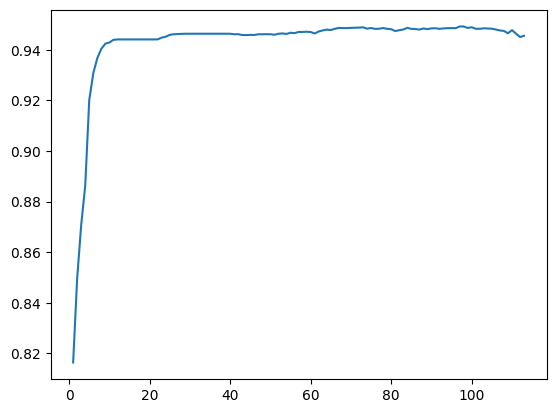

In [11]:
y_points = np.array(list(all_iterations['avg_score']))
x_points = np.array([i for i in range(1, len(y_points) + 1)])

plt.plot(x_points, y_points)